In [2]:
# Load relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
top_us = pd.read_csv("./data/2021.01.04 spotify_us_collab_fe.csv")
top_us.head()

,Unnamed: 0,Date,Track Name,Streams,Position,Artist Name,Artist No.,No. of Artists,Artist Genre,Track URI,...,Song_consec_day,Artist_first_onchart,Artist_cumu_songs,Artist_cumu_collab,Artist_cumu_solo,Artist_days_onchart,Collab_avg_days_onchart,Collab_avg_cumu_songs,Collab_avg_cumu_collab,Collab_avg_cumu_solo
0,0,2017-01-01,Lighthouse - Andrelli Remix,149929,183,Hearts & Colors,1,2,"['post-teen pop', 'viral pop']",04CttTezSnv71USiiG9mIo,...,1,2017-01-01,1,1,0,1,1.0,1.000000,1.000000,0.0
1,1,2017-01-01,Lighthouse - Andrelli Remix,149929,183,Andrelli,2,2,['swedish pop'],04CttTezSnv71USiiG9mIo,...,1,2017-01-01,1,1,0,1,1.0,1.000000,1.000000,0.0
2,2,2017-01-01,In the Name of Love,435945,27,Martin Garrix,1,2,"['big room', 'dance pop', 'edm', 'electro hous...",04DwTuZ2VBdJCCC5TROn7L,...,1,2017-01-01,1,1,0,1,1.0,2.000000,1.500000,0.5
3,3,2017-01-01,In the Name of Love,435945,27,Bebe Rexha,2,2,"['dance pop', 'electropop', 'pop', 'pop dance'...",04DwTuZ2VBdJCCC5TROn7L,...,1,2017-01-01,3,2,1,1,1.0,2.000000,1.500000,0.5
4,4,2017-01-01,Party,151474,178,Chris Brown,1,3,"['dance pop', 'pop', 'pop rap', 'r&b', 'rap']",05Z7jet4VDNVgNQWcYHnrk,...,1,2017-01-01,1,1,0,1,1.0,1.666667,1.666667,0.0


In [33]:
top_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273601 entries, 0 to 273600
Data columns (total 33 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               273601 non-null  int64  
 1   Date                     273601 non-null  object 
 2   Track Name               273601 non-null  object 
 3   Streams                  273601 non-null  int64  
 4   Position                 273601 non-null  int64  
 5   Artist Name              273601 non-null  object 
 6   Artist No.               273601 non-null  int64  
 7   No. of Artists           273601 non-null  int64  
 8   Artist Genre             273601 non-null  object 
 9   Track URI                273601 non-null  object 
 10  Country                  273601 non-null  object 
 11  Artist URI               273601 non-null  object 
 12  Album URI                273601 non-null  object 
 13  Album_release_month      273601 non-null  int64  
 14  Albu

In [34]:
top_us.isnull().any()

Unnamed: 0                 False
Date                       False
Track Name                 False
Streams                    False
Position                   False
Artist Name                False
Artist No.                 False
No. of Artists             False
Artist Genre               False
Track URI                  False
Country                    False
Artist URI                 False
Album URI                  False
Album_release_month        False
Album_release_dayweek      False
Album Release              False
Year_chart                 False
Month_chart                False
Song_first_onchart         False
Song_days_since_first      False
Song_days_onchart          False
Song_days_since_release    False
Song_streak_id             False
Song_consec_day            False
Artist_first_onchart       False
Artist_cumu_songs          False
Artist_cumu_collab         False
Artist_cumu_solo           False
Artist_days_onchart        False
Collab_avg_days_onchart    False
Collab_avg

## Variables Outline 
1- Date: The date a given song appears on the Top 200 chart.

2- Track Name: Name of the track/song.

3- Streams: Number of streams on a given Date.

4- Position: Ranking according to number of streams in a region.

5- Artist Name: Name of the main artist.

6- Artist No.: The index of the collaborator for the given song when the dataframe is in long format (purely for stacking/unstacking/pivoting purposes). Collaborator No. 1 is usually the main artist.

7- No. of Artists: Number of distinct artists credited for a given song

8- Artist Genre: 

9- Track URI: Spotify's unique identifier for the song

10- Country: The country of the chart. This project uses the U.S. charts only

11- Artist URI: Spotify's unique identifier for the artist(s)

12- Album URI: Spotify's unique identifier for the album to which the song belongs

13- Album_release_month: The month component of Album Release date

14- Album_release_dayweek: The day of the week of the Album Release date

15- Album Release: The album's release date (may not always be accurate to the day)

16- Year_chart: The year component of Date

17- Month_chart: The month component of Date

18- Song_first_onchart: The earliest day a given song appears in a given country's chart

19- Song_days_since_first: The number of days elapsed between Song_first_onchart and the current Date

20- Song_days_onchart: The number of days the song has appeared on the chart in the given country

21- Song_days_since_release: The number of days elapsed between Album Release and the current chart date. CAUTION: because the Album release date is not always accurate to the day level, it is possible that the song may reach the chart before it is officially considered "released" by Spotify, leading to negative values for Song_days_since_release. Use with caution.

22- Song_streak_id: Unique identifier of a given song's streak in a given country

23- Song_consec_day: Unique identifier of a day within a unique streak id

24- Artist_first_onchart: The earliest day a given artist appears in a given country's chart

25- Artist_cumu_songs: The given artist's cumulative total number of songs up until the current Date

26- Artist_cumu_collab: The given artist's cumulative total number of collaborative songs up until the current date

27- Artist_cumu_solo: The given artist's cumulative total number of solo songs up until the current date

28- Artist_days_onchart: The given artist's cumulative number of days/appearance on a given country's chart up until the current Date

29- Collab_avg_days_onchart: The average number of days spent on the chart of all the collaborators credited in the song (up until the current date)

30- Collab_avg_cumu_songs: The average number of songs of each collaborator credited in the song (up until the current date)

31- Collab_avg_cumu_collab:The average number of collaborative songs of all the collaborators credited in the song (up until the current date)

32- Collab_avg_cumu_solo: The average number of solo songs of all the collaborators credited in the song (up until the current date)
29- Day_week: Day of the week, in 3-letter abbreviation

30- Week_id_BB: The ID of the week within a year, but resets on a Tuesday to match with Billboard's week.

31- Week_mean_streams: The mean number of streams for a given Year_week_id for a given country.

### Marginal distributions of key quantities of interest ###
We start investigating by gaining an overhead view of various parameters in our data. Let's start by doing so for some numeric variables, such as ```Position```, ```Streams```, ```No. of Artists```, ``` Artist Genre```, ```Collab_avg_days_onchart```, ```Collab_avg_cumu_songs```, and ```Song_days_since_release```.

In [35]:
top_us[['Position', 'Streams', 'No. of Artists', 'Artist Genre', 'Collab_avg_days_onchart', 'Collab_avg_cumu_songs', 'Song_days_onchart']].describe()

,Position,Streams,No. of Artists,Collab_avg_days_onchart,Collab_avg_cumu_songs,Song_days_onchart
count,273601.000000,2.736010e+05,273601.000000,273601.000000,273601.000000,273601.000000
mean,97.780392,3.967226e+05,2.571091,396.859248,29.508039,111.680973
std,57.674022,2.654753e+05,0.991199,282.705348,27.870607,138.674204
min,1.000000,1.254840e+05,2.000000,1.000000,1.000000,1.000000
25%,48.000000,2.367290e+05,2.000000,169.000000,9.000000,21.000000
50%,96.000000,3.039440e+05,2.000000,348.000000,20.666667,63.000000
75%,148.000000,4.590750e+05,3.000000,570.500000,41.500000,150.000000
max,200.000000,4.444027e+06,22.000000,1384.500000,204.000000,1137.000000


## Inspecting songs' position against variables of interest


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


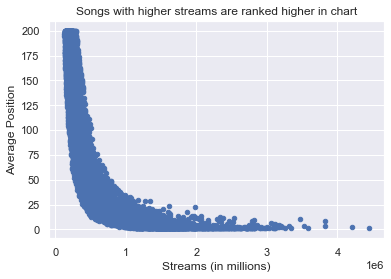

In [36]:
# graph average streams vs Position

ax = (
    top_us.groupby(["Streams"])["Position"]
    .mean()
    .reset_index(name="Position")
    .sort_values(by="Streams", ascending= False)
    .plot.scatter(x="Streams", y="Position")
)
ax.set_xlabel("Streams (in millions)")
ax.set_ylabel("Average Position")
a = ax.set_title("Songs with higher streams are ranked higher in chart") # as expected

In [37]:
top_us_genre = (
    top_us.groupby(["Artist Genre"])["Position"]
    .count()
    .reset_index(name="Count")
    .sort_values(by="Count", ascending= False)
    .head(5)
)
top_us_genre=top_us_genre.set_index('Artist Genre')
top_us_genre

,Count
Artist Genre,
"['canadian hip hop', 'canadian pop', 'hip hop', 'pop rap', 'rap', 'toronto rap']",7966
"['melodic rap', 'pop rap', 'rap', 'trap']",7434
"['dfw rap', 'melodic rap', 'rap']",5984
['rap'],5582
"['melodic rap', 'rap', 'trap']",5074


Text(0.5, 1.0, 'Top 5 generes for Chart 200')

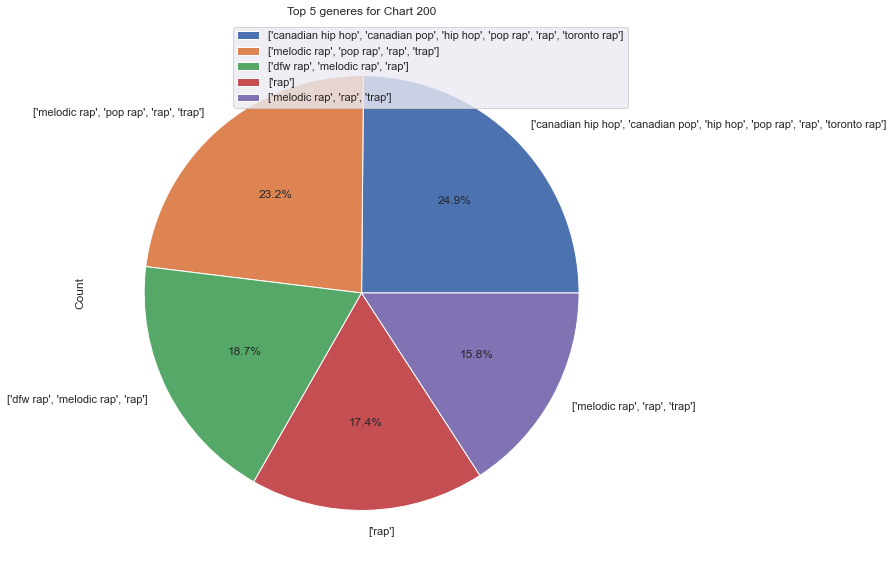

In [38]:
ax1 = top_us_genre.plot.pie(y='Count', autopct='%1.1f%%', figsize=(10, 10))
ax1.set_title("Top 5 generes for Chart 200")

From the pie chart above,['canadian hip hop', 'canadian pop', 'hip hop', 'pop rap', 'rap', 'toronto rap'] seem to be the top genres among the 200 chart in the US since 2017.  

In [39]:
top_10=top_us[top_us['Position']<= 10]
top_10_genre = (
    top_10.groupby(["Artist Genre"])["Position"]
    .count()
    .reset_index(name="Count")
    .sort_values(by="Count", ascending= False)
    .head(5)
)
top_10_genre=top_10_genre.set_index('Artist Genre')
top_10_genre


,Count
Artist Genre,
"['dfw rap', 'melodic rap', 'rap']",848
"['canadian hip hop', 'canadian pop', 'hip hop', 'pop rap', 'rap', 'toronto rap']",669
"['melodic rap', 'pop rap', 'rap', 'trap']",476
"['canadian pop', 'pop', 'post-teen pop']",435
"['dance pop', 'pop', 'pop rap', 'rap']",422


Text(0.5, 1.0, 'Top 5 generes for 10 top songs in chart 200')

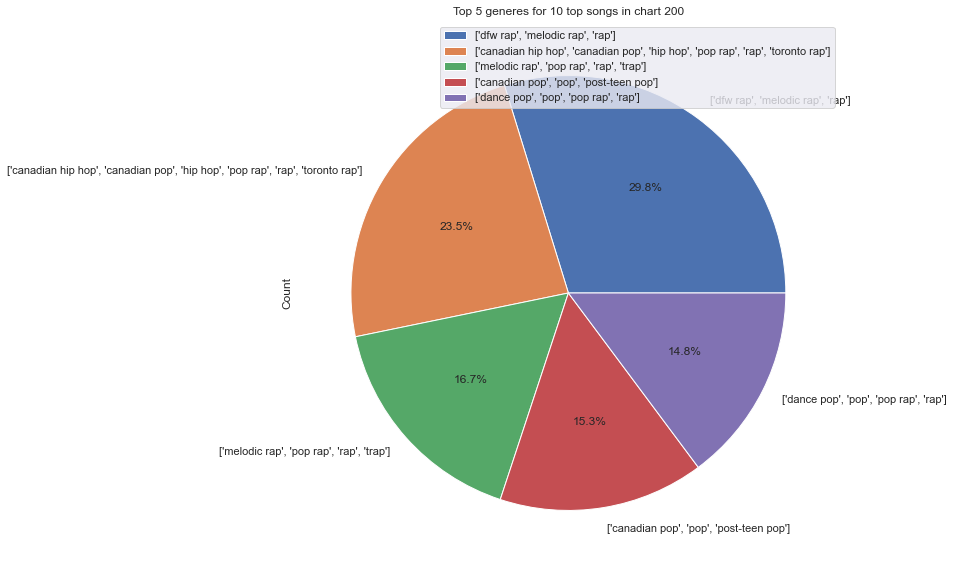

In [40]:
ax1b = top_10_genre.plot.pie(y='Count', autopct='%1.1f%%', figsize=(10, 10))
ax1b.set_title("Top 5 generes for 10 top songs in chart 200")

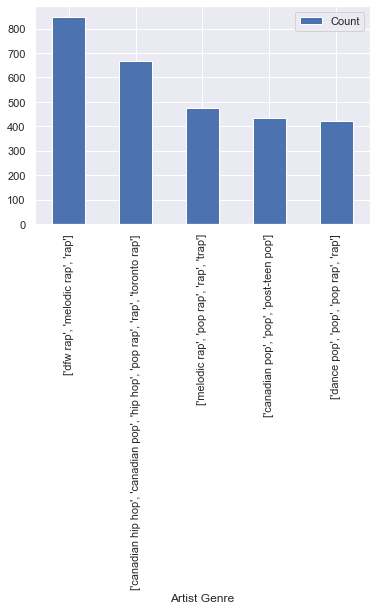

In [41]:
top_10=top_us[top_us['Position']<= 10]
top_10_genre = (
    top_10.groupby(["Artist Genre"])["Position"]
    .count()
    .reset_index(name="Count")
    .sort_values(by="Count", ascending= False)
    .head(5)
    .plot.bar(x="Artist Genre", y="Count")
)
#top_10_genre.invert_yaxis()
# Reversing this plot would be better

From the chart above,['dfw rap', 'melodic rap', 'rap'] seem to be the top genres among the top 10 (with ranking between the 1st and 10th) od the 200 chart in the US since 2017.  

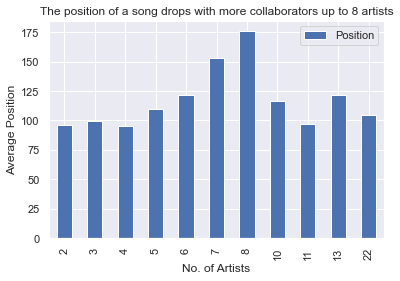

In [42]:
# graph No of Artists vs Position
ax2 = (
    top_us.groupby(["No. of Artists"])["Position"]
    .mean()
    .reset_index(name="Position")
    .sort_values(by="No. of Artists", ascending= True)
    .plot.bar(x="No. of Artists", y="Position")
)
ax2.set_xlabel("No. of Artists")
ax2.set_ylabel("Average Position")
c = ax2.set_title("The position of a song drops with more collaborators up to 8 artists")

Text(0.5, 1.0, 'The position of a song drops with more collaborators up to 8 artists')

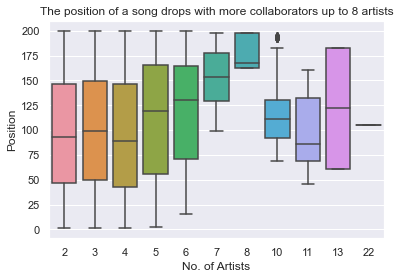

In [43]:
# boxplot graph for No of collaborators vs Position 
sns.boxplot(x = 'No. of Artists', y='Position', data = top_us)
plt.ylabel("Position")
plt.title("The position of a song drops with more collaborators up to 8 artists")

Songs with up to 4-artist collaboration rank higher on the chart 200 over all. Songs featuring 10 artsts and more seem to rank closer to the top charts perhaps because they are classic holiday/seasonal songs, or a large musical production. 

In [44]:
top_us_no_artist= top_us[top_us['No. of Artists']>= 10]
top_us_no_artist

,Unnamed: 0,Date,Track Name,Streams,Position,Artist Name,Artist No.,No. of Artists,Artist Genre,Track URI,...,Song_consec_day,Artist_first_onchart,Artist_cumu_songs,Artist_cumu_collab,Artist_cumu_solo,Artist_days_onchart,Collab_avg_days_onchart,Collab_avg_cumu_songs,Collab_avg_cumu_collab,Collab_avg_cumu_solo
55917,87393,2017-10-06,Almost Like Praying (feat. Artists for Puerto ...,299656,105,Lin-Manuel Miranda,1,22,['show tunes'],3dskm5fAe8OkBtM9E0VVWx,...,1,2017-10-06,1,1,0,1,25.090909,1.545455,1.454545,0.090909
55918,87394,2017-10-06,Almost Like Praying (feat. Artists for Puerto ...,299656,105,Alex Lacamoire,2,22,[],3dskm5fAe8OkBtM9E0VVWx,...,1,2017-10-06,1,1,0,1,25.090909,1.545455,1.454545,0.090909
55919,87395,2017-10-06,Almost Like Praying (feat. Artists for Puerto ...,299656,105,Ana Villafañe,3,22,[],3dskm5fAe8OkBtM9E0VVWx,...,1,2017-10-06,1,1,0,1,25.090909,1.545455,1.454545,0.090909
55920,87396,2017-10-06,Almost Like Praying (feat. Artists for Puerto ...,299656,105,Anthony Ramos,4,22,"['hollywood', 'show tunes']",3dskm5fAe8OkBtM9E0VVWx,...,1,2017-10-06,1,1,0,1,25.090909,1.545455,1.454545,0.090909
55921,87397,2017-10-06,Almost Like Praying (feat. Artists for Puerto ...,299656,105,Camila Cabello,5,22,"['dance pop', 'electropop', 'pop', 'pop dance'...",3dskm5fAe8OkBtM9E0VVWx,...,1,2017-01-01,11,9,2,276,25.090909,1.545455,1.454545,0.090909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256083,409207,2020-09-05,"Friday Night Cypher (feat. Tee Grizzley, Kash ...",271255,132,Boldy James,7,11,"['alternative hip hop', 'boom bap', 'hip hop',...",2kY2ROHIGdp3aA6ahqaUKm,...,2,2020-09-04,1,1,0,2,220.818182,16.272727,11.000000,5.272727
256084,409208,2020-09-05,"Friday Night Cypher (feat. Tee Grizzley, Kash ...",271255,132,Drego,8,11,['detroit trap'],2kY2ROHIGdp3aA6ahqaUKm,...,2,2020-09-04,1,1,0,2,220.818182,16.272727,11.000000,5.272727
256085,409209,2020-09-05,"Friday Night Cypher (feat. Tee Grizzley, Kash ...",271255,132,Sada Baby,9,11,"['detroit trap', 'scam rap', 'trap']",2kY2ROHIGdp3aA6ahqaUKm,...,2,2020-09-04,2,1,1,2,220.818182,16.272727,11.000000,5.272727
256086,409210,2020-09-05,"Friday Night Cypher (feat. Tee Grizzley, Kash ...",271255,132,"Royce Da 5'9""",10,11,"['alternative hip hop', 'detroit hip hop', 'ga...",2kY2ROHIGdp3aA6ahqaUKm,...,2,2018-08-31,5,5,0,69,220.818182,16.272727,11.000000,5.272727


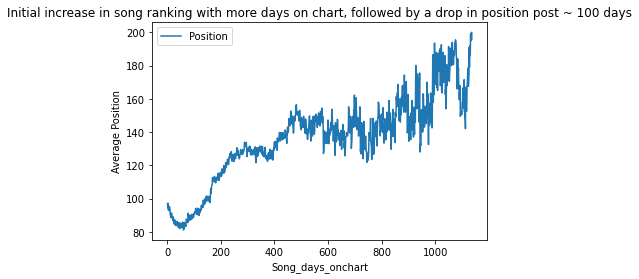

In [209]:
# graph days a song is on chart vs average position
ax3 = (
    top_us.groupby(["Song_days_onchart"])["Position"]
    .mean()
    .reset_index(name="Position")
    .sort_values(by="Song_days_onchart", ascending= True)
    .plot.line(x="Song_days_onchart", y="Position")
)
ax3.set_xlabel("Song_days_onchart")
ax3.set_ylabel("Average Position")
d = ax3.set_title("Initial increase in song ranking with more days on chart, followed by a drop in position post ~ 100 days") 

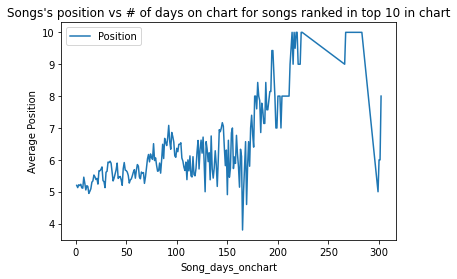

In [286]:

# graph days a song is on chart vs average position for songs ranked in top 10 
ax4 = (
    top_10.groupby(["Song_days_onchart"])["Position"]
    .mean()
    .reset_index(name="Position")
    .sort_values(by="Song_days_onchart", ascending= True)
    .plot.line(x="Song_days_onchart", y="Position")
)
ax4.set_xlabel("Song_days_onchart")
ax4.set_ylabel("Average Position")
e = ax4.set_title("Songs's position vs # of days on chart for songs ranked in top 10 in chart") 

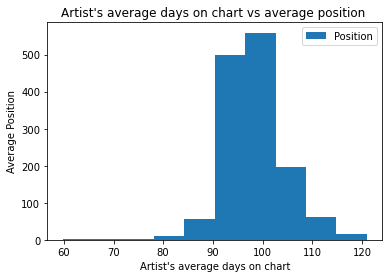

In [289]:
# plotting Artist_days_onchart vs average position 
ax5 = (
    top_us.groupby(["Artist_days_onchart"])["Position"]
    .mean()
    .reset_index(name="Position")
    .sort_values(by="Position", ascending=True)
    .plot.hist(x="Artist_days_onchart", y="Position")
)
ax5.set_xlabel("Artist's average days on chart")
ax5.set_ylabel("Average Position")
f = ax5.set_title("Artist's average days on chart vs average position ")

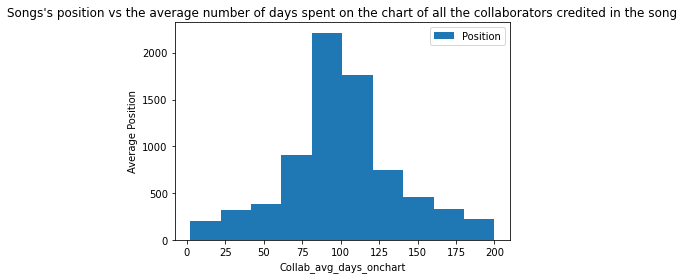

In [212]:

ax6 = (
    top_us.groupby(["Collab_avg_days_onchart"])["Position"]
    .mean()
    .reset_index(name="Position")
    .sort_values(by="Collab_avg_days_onchart", ascending= True)
    .plot.hist(x="Collab_avg_days_onchart", y="Position")
)
ax6.set_xlabel("Collab_avg_days_onchart")
ax6.set_ylabel("Average Position")
g = ax6.set_title("Songs's position vs the average number of days spent on the chart of all the collaborators credited in the song") 

## Investigating correlations


In [281]:
# Create a correlation matrix
corr    = top_us.corr()
pos_cor = corr['Position'] >0
neg_cor = corr['Position'] <0
corr['Position'][pos_cor].sort_values(ascending = False)

Position                   1.000000
Song_days_since_first      0.274646
Song_streak_id             0.261527
Song_days_onchart          0.256863
Song_days_since_release    0.050872
No. of Artists             0.046438
Artist No.                 0.025811
Year_chart                 0.014811
Unnamed: 0                 0.010226
Collab_avg_days_onchart    0.007098
Artist_days_onchart        0.006121
Album_release_month        0.003664
Name: Position, dtype: float64

In [283]:
corr['Position'][neg_cor].sort_values()

Streams                  -0.745268
Collab_avg_cumu_songs    -0.057974
Collab_avg_cumu_solo     -0.055410
Collab_avg_cumu_collab   -0.051747
Song_consec_day          -0.047811
Artist_cumu_songs        -0.046756
Artist_cumu_solo         -0.042137
Artist_cumu_collab       -0.041958
Month_chart              -0.019041
Name: Position, dtype: float64